# Finding Heavy Traffic Indicators on I-94

The goal of our analysis is to determine a few indicators of heavy traffic on I-94.<br>
These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

***
### Importing packages

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

***
### Read the `Metro_Interstate_Traffic_Volume.csv`

In [1]:
metro_data = pd.read_csv("additional_files/Metro_Interstate_Traffic_Volume.csv")

Now we examine the fist and the last five rows to get a fist impression of the dataset.

In [2]:
metro_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
metro_data.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


Here we can see that our dataset contains the traffic data from 2012-10-02 09:00:00 to 2018-09-30 23:00:00.

Further, we show more information about the dataset. This helps us to identify the data type of the columns and columns containing `zero-values`.

In [5]:
metro_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The information tell us that in the loaded dataset, no columns contains `zero-values`. Also, the column `date_time` was imported as strings (`object`). So this column needs a type conversion for further processing.

***
### Histogram and Description of the `trafic_volume`

First, we're going to plot a histogram to visualize the distribution of the traffic_volume column.

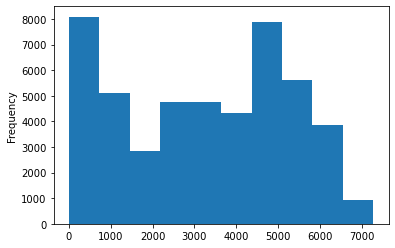

In [9]:
metro_data["traffic_volume"].plot.hist()
plt.show()

Next, we look up a few statistics about the `traffic_volume` column

In [10]:
metro_data["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.

***
### Traffic Volume: Day vs. Night

To observe the difference in the traffic volume at day and at night, we split the dataset into two parts.
* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [20]:
# Transformation of the 'date_time' column from `òbject` to `datetime`
metro_data["date_time"] = pd.to_datetime(metro_data["date_time"])

# Get the hour of every instance of the `date_time` column
hours = metro_data["date_time"].dt.hour

# Split the dataset in daytime and nighttime data
daytime_data = metro_data[(hours >= 7) & (hours < 19)]
print(daytime_data.shape)
nighttime_data = metro_data[(hours >= 19) | (hours < 7)]
print(nighttime_data.shape)

(23877, 9)
(24327, 9)


After the splitting we can see that `23,877` rows of the dataset belong to the daytime and `24,327` rows to the nighttime.

Now we can first compare the histograms of the daytime and nighttime:

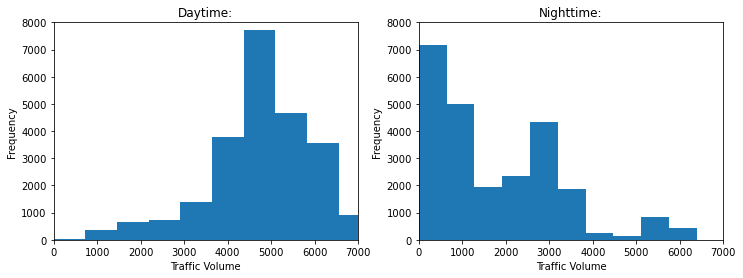

In [29]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
daytime_data["traffic_volume"].plot.hist()
plt.title("Daytime:")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim([0,7000])
plt.ylim([0,8000])

plt.subplot(1,2,2)
nighttime_data["traffic_volume"].plot.hist()
plt.title("Nighttime:")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim([0,7000])
plt.ylim([0,8000])

plt.show()

Some further statistical comparison of daytime and nighttime

In [118]:
print("Daytime Statistics:")
print(daytime_data["traffic_volume"].describe())
print("\n")
print("Nighttime Statistics:")
print(nighttime_data["traffic_volume"].describe())

Daytime Statistics:
count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64


Nighttime Statistics:


count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

***
### Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

* Month
* Day of the week
* Time of day

#### 1. Month

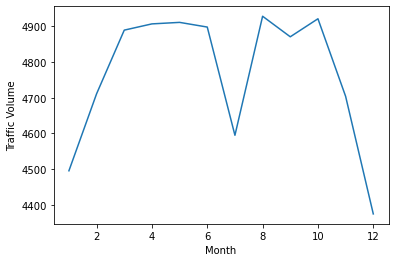

In [75]:
daytime_data.loc[:,"month"] = daytime_data.loc[:,"date_time"].dt.month
mean_by_month = daytime_data.groupby("month",axis=0).mean()

plt.plot(mean_by_month.loc[:,"traffic_volume"])
plt.xlabel("Month")
plt.ylabel("Traffic Volume")
plt.show()

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?

To answer the last question, let's see how the traffic volume changed each year in July.

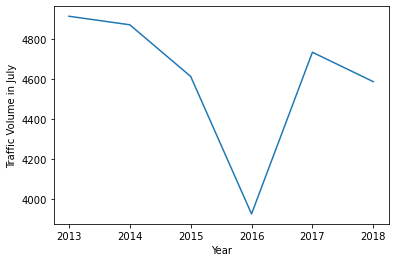

In [76]:
daytime_data.loc[:,"year"] = daytime_data.loc[:,"date_time"].dt.year
only_july = daytime_data.loc[daytime_data.loc[:,"month"] == 7,:]

only_july.groupby("year",axis=0).mean().loc[:,"traffic_volume"].plot.line()
plt.xlabel("Year")
plt.ylabel("Traffic Volume in July")
plt.show()

Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — <a href=https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696>this article from 2016</a> supports this hypothesis.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

#### 2. Day ofthe Week

Let's now look at a more granular inicator: day number.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


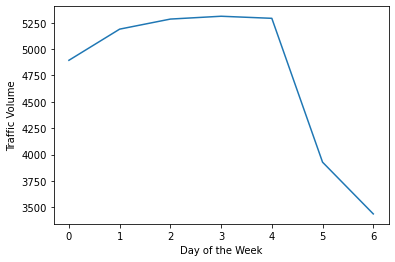

In [108]:
daytime_data.loc[:,"dayofweek"] = daytime_data.loc[:,"date_time"].dt.dayofweek
mean_by_dayofweek = daytime_data.groupby("dayofweek",axis=0).mean()

mean_by_dayofweek.loc[:,"traffic_volume"].plot.line()
plt.xlabel("Day of the Week")
plt.ylabel("Traffic Volume")
plt.show()

Traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see values over 5,000 during business days. Traffic is lighter on weekends, with values below 4,000 cars.

#### 3. Time of Day

Let's now see what values we have based on time of the day. The weekends, however, will drag down the average values, so we're going to look at the averages separately.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


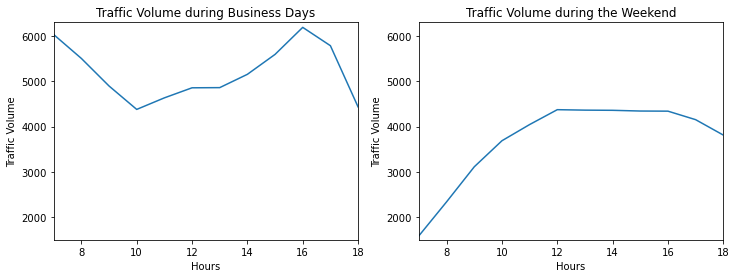

In [109]:
daytime_data.loc[:,"hour"] = daytime_data["date_time"].dt.hour
bussiness_days = daytime_data.copy()[daytime_data["dayofweek"] <= 4] # 4 == Friday
weekend = daytime_data.copy()[daytime_data["dayofweek"] > 4] # 5 == Saturday
mean_by_hour_business = bussiness_days.groupby("hour").mean()
mean_by_hour_weekend = weekend.groupby("hour").mean()

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
mean_by_hour_business["traffic_volume"].plot.line()
plt.title("Traffic Volume during Business Days")
plt.xlabel("Hours")
plt.ylabel("Traffic Volume")
plt.xlim([7,18])
plt.ylim([1500,6300])

plt.subplot(1,2,2)
mean_by_hour_weekend["traffic_volume"].plot.line()
plt.title("Traffic Volume during the Weekend")
plt.xlabel("Hours")
plt.ylabel("Traffic Volume")
plt.xlim([7,18])
plt.ylim([1500,6300])

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:

* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7 and 16.


***
### Weather indicator

So far, we've focused on finding time indicators for heavy traffic, and we reached the following conclusions:

* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7 and 16.

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

A few of these columns are numerical so let's start by looking up their correlation values with `traffic_volume`.

In [120]:
weather_corr = daytime_data.loc[:,["traffic_volume","temp","rain_1h","snow_1h","clouds_all"]].corr()
weather_corr.loc[:,"traffic_volume"]

traffic_volume    1.000000
temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
Name: traffic_volume, dtype: float64

The correlation table indicates that the wather indicator with the highest correlation to the `traffic_volume` is the `temp`.<br>
To observe the correlation between temperature and traffic volume further, we plot a scatter plot.

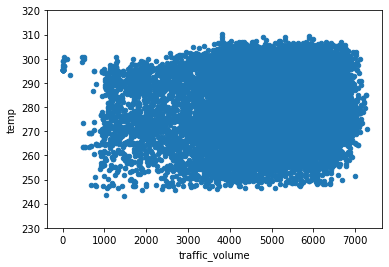

In [122]:
daytime_data.plot.scatter(x="traffic_volume",y="temp")
plt.ylim([230,320]) # two wrong 0K temperatures mess up the y-axis
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

Let's now look at the other weather-related columns: weather_main and weather_description.

***
### Weather types

Previously, we examined the correlation between `traffic_volume` and the numerical weather columns. However, we didn't find any reliable indicator of heavy traffic.

To see if we can find more useful data, we'll look next at the categorical weather-related columns: `weather_main` and `weather_description`.

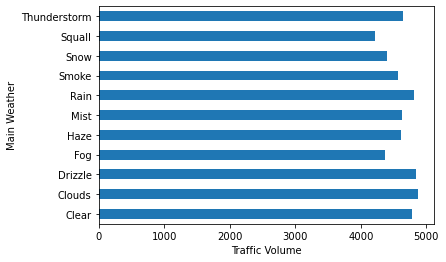

In [125]:
mean_by_weather_main = daytime_data.groupby('weather_main').mean()

mean_by_weather_main.loc[:,"traffic_volume"].plot.barh()
plt.xlabel("Traffic Volume")
plt.ylabel("Main Weather")
plt.show()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by `weather_description`, which has a more granular weather classification.

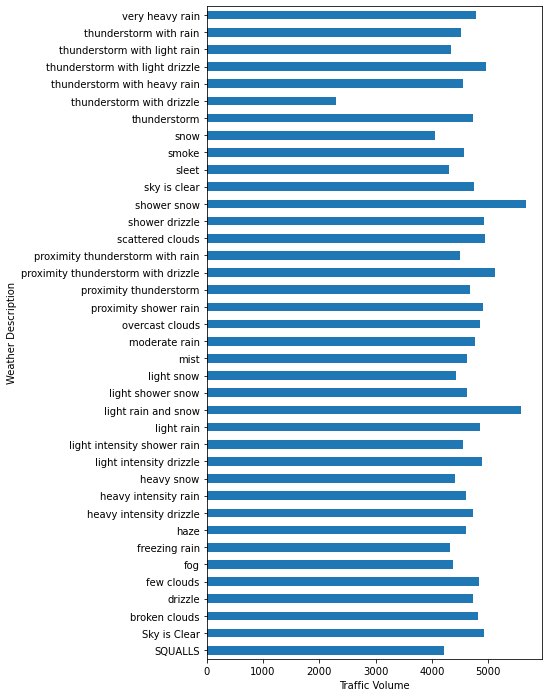

In [135]:
mean_by_weather_description = daytime_data.groupby('weather_description').mean()

mean_by_weather_description.loc[:,"traffic_volume"].plot.barh(figsize=(6,12))
plt.xlabel("Traffic Volume")
plt.ylabel("Weather Description")
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

***
### Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

* Time indicators
  * The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
  * The traffic is usually heavier on business days compared to the weekends.
  * On business days, the rush hours are around 7 and 16.
* Weather indicators
  * Shower snow
  * Light rain and snow
  * Proximity thunderstorm with drizzle
